## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:

In [499]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3

#### Genre analysis-what genres are consistent in box office

In [500]:
#import the movie info tsv file
movie_info_df = pd.read_csv("rt.movie_info.tsv", delimiter="\t")
print(movie_info_df.shape)
movie_info_df.head()

(1560, 12)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [501]:
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [502]:
movie_info_df.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [503]:
movie_info_df = movie_info_df.dropna()

In [504]:
movie_info_df.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [505]:
#most watched genres group by genre
movie_drama = movie_info_df["genre"].value_counts()
print(movie_drama)

# Extract the top N genres and their counts
top_genres = movie_drama.index[:10]  # Change 5 to the desired number of top genres
genre_counts_top = movie_drama[:10]


genre
Drama                                                                        33
Comedy                                                                       32
Comedy|Drama                                                                 22
Drama|Mystery and Suspense                                                   11
Comedy|Drama|Romance                                                          9
                                                                             ..
Comedy|Mystery and Suspense                                                   1
Art House and International|Horror|Mystery and Suspense                       1
Art House and International|Comedy|Drama                                      1
Action and Adventure|Art House and International|Comedy|Cult Movies|Drama     1
Action and Adventure|Art House and International                              1
Name: count, Length: 76, dtype: int64


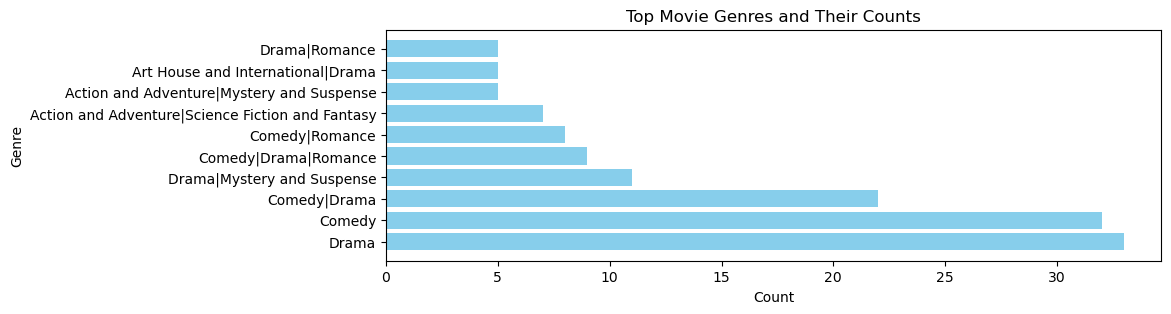

In [506]:
plt.figure(figsize=(10, 3))
plt.barh(top_genres, genre_counts_top, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top Movie Genres and Their Counts')
plt.show()

###### This shows Drama is most frequently watched movie according to the dataset genre followed by comedy then a combination of both comedy and drama

In [507]:
movie_studio = movie_info_df["studio"].value_counts()

# Display the studio counts
print(movie_studio)

# Change to the desired number of top studios
top_studios = movie_studio.index[:10]
studio_counts_top = movie_studio[:10]

studio
Universal Pictures             23
Paramount Pictures             15
Sony Pictures                  12
20th Century Fox               12
Warner Bros. Pictures          11
                               ..
Sony Pictures Entertainment     1
Screen Gems/SONY PICTURES       1
Monterey Media                  1
WB                              1
IDP Distribution                1
Name: count, Length: 101, dtype: int64


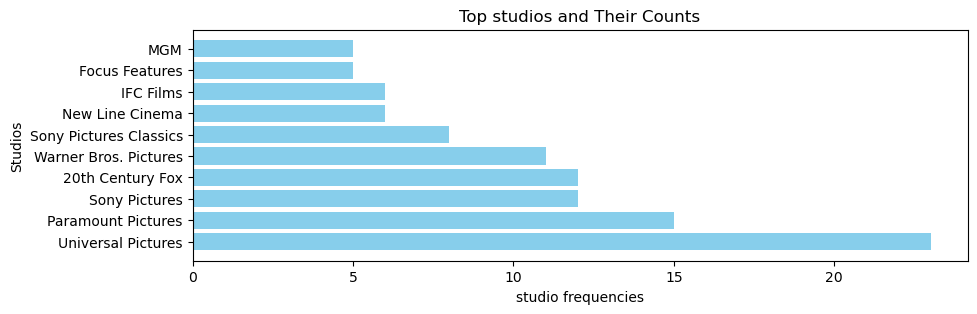

In [509]:
plt.figure(figsize=(10, 3))
plt.barh(top_studios, studio_counts_top, color='skyblue')
plt.xlabel('studio frequencies')
plt.ylabel('Studios')
plt.title('Top studios and Their Counts')
plt.show()

In [312]:
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [393]:
# Convert 'runtime' to string, extract numeric part, fill NaN with 0, and convert to int
movie_info_df['runtime'].astype(str).str.extract('(\d+)').fillna(0).astype(int)

# Display the DataFrame
movie_stats = movie_info_df.describe()
movie_runtime = movie_stats.drop("id",axis=1)
movie_runtime

,runtime
count,235.000000
mean,106.663830
std,18.147125
min,67.000000
25%,93.000000
50%,105.000000
75%,117.000000
max,188.000000


C:\Users\Hp\.conda\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


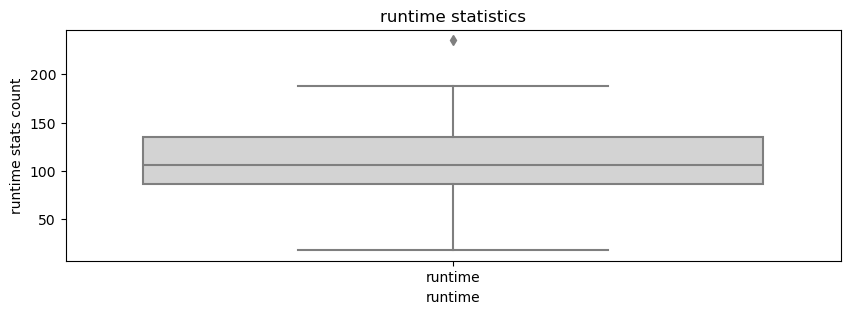

In [418]:
plt.figure(figsize=(10, 3))
sns.boxplot(movie_runtime,color='lightgrey')
plt.xlabel('runtime')
plt.ylabel('runtime stats count')
plt.title('runtime statistics')
plt.show()

In [400]:
# average runtime of all mvoies genres
mean_ = movie_info_df["runtime"].mean()
median_ = movie_info_df["runtime"].median()
print(f"mean:{mean_}")
print(f"mean:{median_}")

mean:106.66382978723404
mean:105.0


The mean and median shows a good number of movies lie around 100minutes meaning more emphasis on making movies that last close to about 100 minutes

In [432]:
#finding 
movie_ratings = movie_info_df["rating"].value_counts()
movie_ratings

rating
R        105
PG-13     77
PG        38
NR         9
G          5
NC17       1
Name: count, dtype: int64

This dataset shows movie that contain drama,or drama and a combination of a different movie

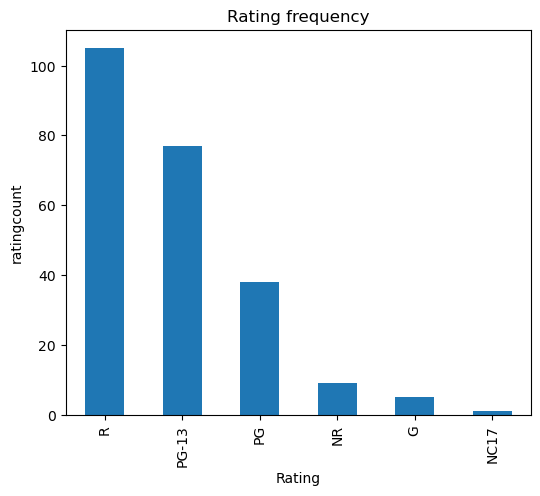

In [473]:
plt.figure(figsize=(6, 5))
movie_ratings.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('ratingcount')
plt.title('Rating frequency')
plt.show()


### Movie budget- What is the cost of producing a movie

##### This part looks at what the company has to spend and what would be gained in domestic stage, international or worldwide and is it making a profit or a loss

In [510]:
budget_df= pd.read_csv("tn.movie_budgets.csv",index_col=0)
budget_df.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"


In [511]:
#removing $ sign and (,) comma for statistical calculation
budget_df['production_budget'] = budget_df['production_budget'].str.replace('[\$,]', '', regex=True)

budget_df['domestic_gross'] = budget_df['domestic_gross'].str.replace('[\$,]', '', regex=True)

budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace('[\$,]', '', regex=True)
budget_df.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875


In [512]:
#converting to int64
budget_df['production_budget'] = budget_df['production_budget'].astype('int64')
budget_df['domestic_gross'] = budget_df['domestic_gross'].astype('int64')
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].astype('int64')
budget_df.head(5)
type(budget_df['worldwide_gross'])

pandas.core.series.Series

In [513]:
#calculating international gross
budget_df['international_gross'] = (budget_df['worldwide_gross']) - (budget_df['domestic_gross'])
budget_df.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1116648995
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1369318718
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,654000000
9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,426920914


In [750]:
budget_df["gross_difference"] = (budget_df["international_gross"]) - (budget_df["domestic_gross"])
budget_df.head(5)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,gross_difference,profits
id,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,1255330029,2351345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,563536125,635063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,64237650,-200237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,485002227,1072413963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,76358983,999721747


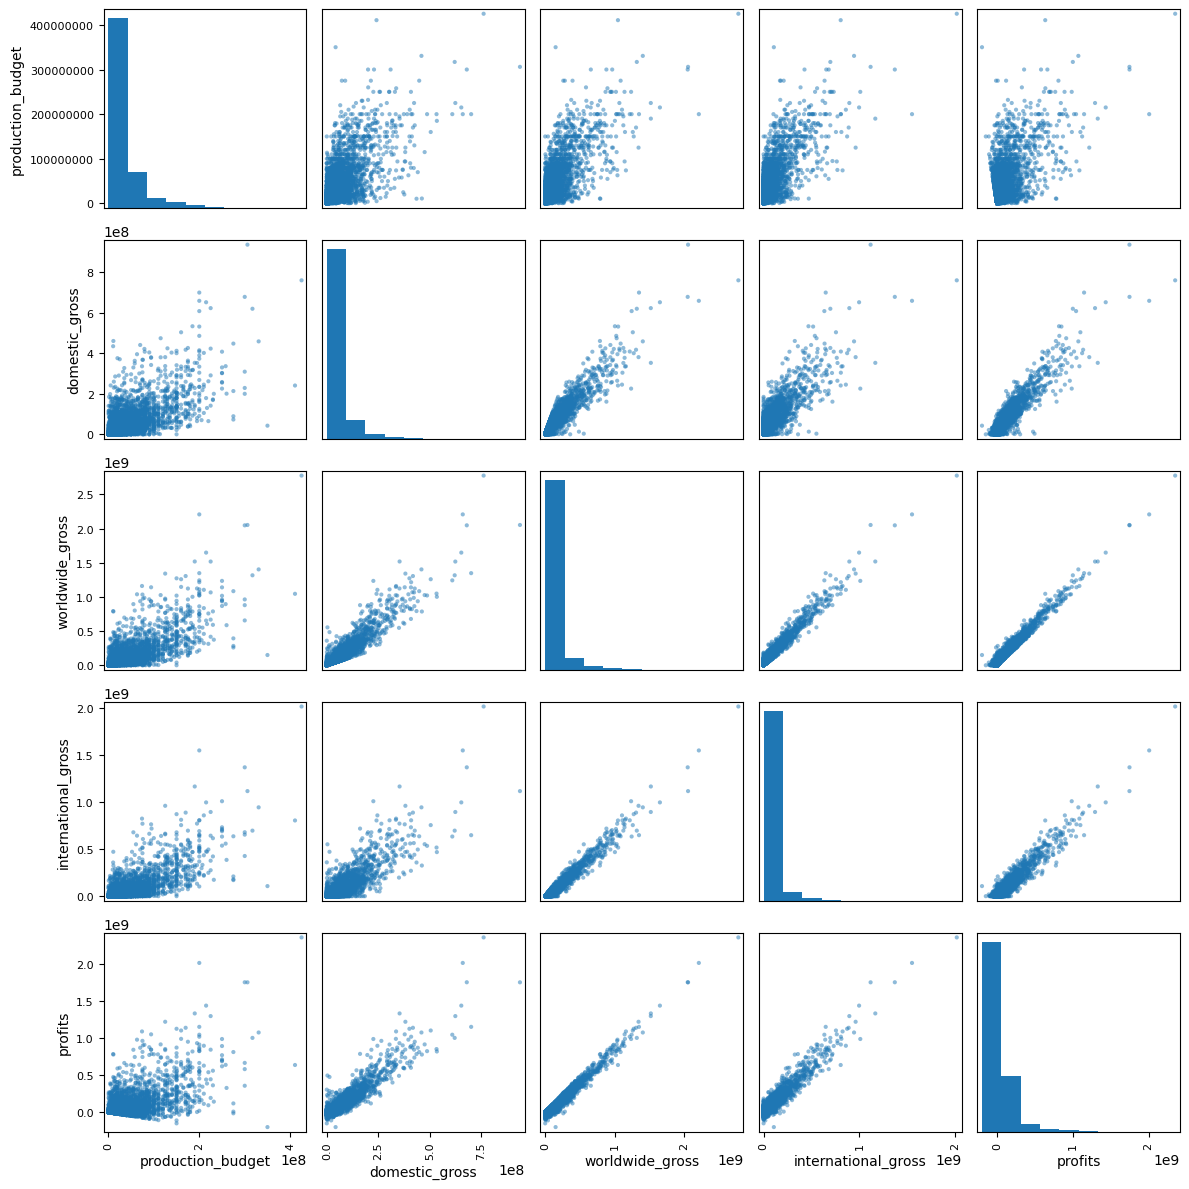

In [771]:
#check for duplicates
budget_df["movie"].duplicated(keep = False).sort_values()
budget_df.head(5)
selected_columns = ['production_budget', 'domestic_gross', 'worldwide_gross', 'international_gross','profits']
scatter_matrix = pd.plotting.scatter_matrix(budget_df[selected_columns], figsize=(12, 12))
plt.tight_layout()

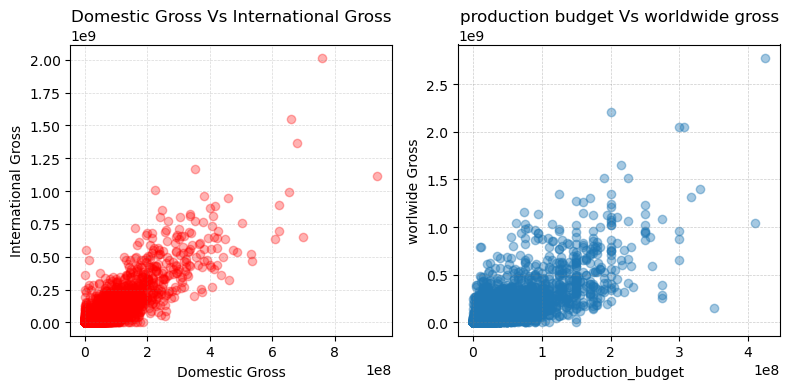

In [694]:

fig, ax = plt.subplots(figsize=(8, 4), ncols=2)

# Scatter plot in the first subplot
ax[0].scatter(x=budget_df["domestic_gross"], y=budget_df["international_gross"], alpha=0.3, color='red')
ax[0].set_xlabel("Domestic Gross")
ax[0].set_ylabel("International Gross")
ax[0].set_title("Domestic Gross Vs International Gross")
ax[0].grid(color='grey', linestyle='dashed', linewidth=0.5, alpha=0.3)

# You can add another plot or modify the first one in the second subplot (ax[1]) if needed


ax[1].scatter(x=budget_df["production_budget"], y=budget_df["worldwide_gross"], alpha=0.4)
ax[1].set_xlabel("production_budget")
ax[1].set_ylabel("worlwide Gross")
ax[1].set_title("production budget Vs worldwide gross")
ax[1].grid(color='grey', linestyle='dashed', linewidth=0.5, alpha=0.4)
plt.tight_layout()
plt.show()


In [584]:
#calculating profit
budget_df["profits"] = (budget_df['worldwide_gross'])-(budget_df['production_budget'])
budget_df.sort_values(by=["production_budget"])
budget_df.head(10)


,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,gross_difference,profits
id,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,1255330029,2351345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,563536125,635063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,64237650,-200237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,485002227,1072413963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,76358983,999721747
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1116648995,179986770,1747311220
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1369318718,690503236,1748134200
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,654000000,344579575,663420425
9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,426920914,197896619,355945209


In [613]:
print(budget_df.columns)


Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'international_gross', 'gross_difference',
       'profits'],
      dtype='object')


In [616]:
# budget_profit_analysis=budget_df["profits"].describe()
# budget_profit_analysis
budget_df["profits"].describe()

count    5.782000e+03
mean     5.989970e+07
std      1.460889e+08
min     -2.002376e+08
25%     -2.189071e+06
50%      8.550286e+06
75%      6.096850e+07
max      2.351345e+09
Name: profits, dtype: float64

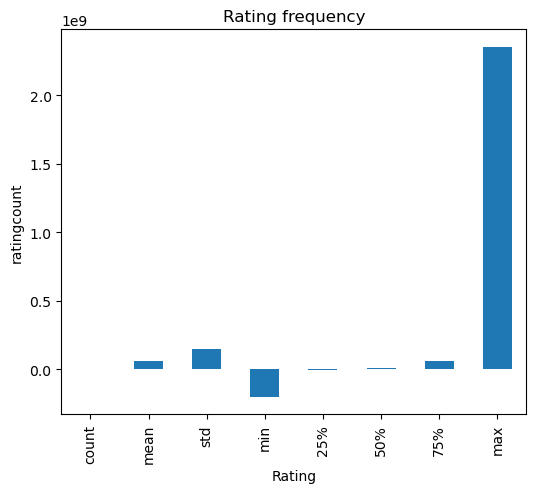

In [617]:
# Plotting
plt.figure(figsize=(6, 5))
budget_profit_analysis.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('ratingcount')
plt.title('Rating frequency')
plt.show()


C:\Users\Hp\.conda\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hp\.conda\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hp\.conda\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hp\.conda\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

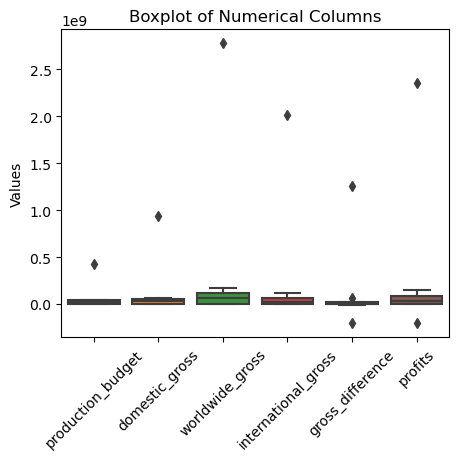

In [619]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=described_df)
plt.title('Boxplot of Numerical Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [669]:
gross_df= pd.read_csv("bom.movie_gross.csv",index_col=0)
gross_df.head(10)

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
Iron Man 2,Par.,312400000.0,311500000,2010
Tangled,BV,200800000.0,391000000,2010
Despicable Me,Uni.,251500000.0,291600000,2010


In [670]:
gross_df = gross_df["studio"].value_counts()
gross_df.head(7)

studio
IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
SPC      123
Sony     110
Name: count, dtype: int64

In [675]:
lang_df= pd.read_csv("tmdb.movies.csv",index_col=0)
print(lang_df.shape)
lang_df.head()

(26517, 9)


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [691]:
lang_df_stats = lang_df.describe()
# lang_df_stats.drop('id', axis=1, inplace=True)
lang_df_stats

,popularity,vote_average,vote_count
count,8.000000,8.000000,8.000000
mean,3326.440893,3319.105528,6236.773242
std,9370.441263,9373.365353,11245.018864
min,0.600000,0.000000,1.000000
25%,1.180500,4.213236,4.250000
50%,3.412456,5.995641,111.112418
75%,23.459672,7.750000,6267.220822
max,26517.000000,26517.000000,26517.000000


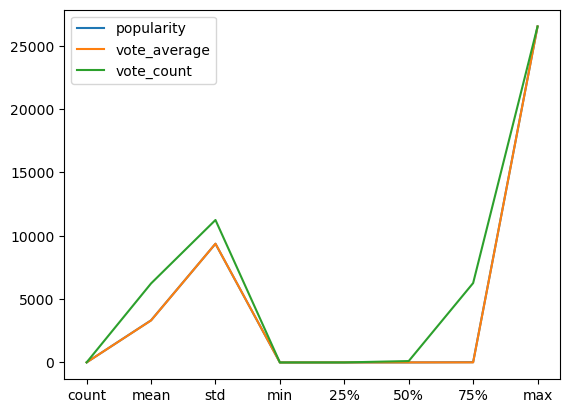

In [726]:
lang_df_stats.plot()
x_label = "lang_df_stats columns"
y_label = "Frequencies"

### Dataset to analyze successful movies in terms of actors, directors, and other key crew members.

In [735]:
movie_info_df = pd.read_csv("rt.movie_info.tsv", delimiter="\t")
print(movie_info_df.shape)
movie_info_df.head(3)


(1560, 12)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


In [744]:
print(movie_info_df.isna().sum())
movie_info_df.dropna().head()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures


In [745]:
print(movie_info_df.isna().sum().head())
movie_info_df.info()

id            0
synopsis     62
rating        3
genre         8
director    199
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [746]:
movie_info_df["rating"].value_counts()

rating
R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: count, dtype: int64

In [ ]:
movie_info_df["writer"].value_counts()

In [ ]:
#fchecking to see if both Steven Speilberg and woody Allen have worked together before
movie_info_df["director"].value_counts()
movie_info_df[(movie_info_df["director"]=='Steven Spielberg') & (movie_info_df["writer"]== "Woody Allen")]

In [ ]:
movie_info_df_rating = movie_info_df.groupby('rating')['box_office']
movie_info_df

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))
x='rating'
y='box_office'
# Plotting the graph
sns.barplot(x, y, data = movie_info_df)
ax.set_xlabel('Rating')
ax.set_ylabel('Box Office Performance')
ax.set_title('A Bar Graph of Rating against Box Office Performance')

# Showing the plot
plt.show();

In [ ]:
reviews_df = pd.read_csv("rt.reviews.tsv", delimiter="\t", encoding='latin1')
print(reviews_df.shape)
reviews_df.head(7)

In [ ]:
print(reviews_df.isna().sum())
reviews_df = reviews_df.dropna().head(50)

In [ ]:
reviews_df.isna().sum()
reviews_df.head()

In [ ]:
reviews_df["rating"].value_counts().head()

### IMDb database analysis

In [632]:
conn = sqlite3.connect("im.db")

#Creating a cursor
cur = conn.cursor()

#Checking the table names of the database
cur.execute("""SELECT name 
FROM sqlite_master 
WHERE type = "table" """)
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [633]:
query = """
SELECT *
FROM movie_basics;
"""
# Creating a DataFrame and checking the data

table = pd.read_sql(query, conn)
table.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [798]:
query0 = """
SELECT *
FROM movie_akas
ORDER BY region,is_original_title;
"""
# Creating a DataFrame and checking the data

table0 = pd.read_sql(query0, conn)
table0.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt6823030,2,"Hilfe, ich hab meine Eltern geschrumpft",None,None,None,None,NaN
1,tt6823030,3,"Help, I've Shrunk My Parents",None,None,None,None,NaN
2,tt10214198,2,Push and Shove,None,None,None,None,0.0
3,tt1418754,2,John Doe,None,None,working,None,0.0
4,tt1582526,3,Collector Gaari Bharya,None,None,None,new title,0.0


In [782]:
query0 = """
SELECT DISTINCT title AS movie_title,region,language,ordering,is_original_title
FROM movie_akas
WHERE is_original_title = "1"
GROUP BY movie_title,region,language
ORDER BY ordering DESC;
"""
# Creating a DataFrame and checking the data

table0 = pd.read_sql(query0, conn)
table0.head(20)

,movie_title,region,language,ordering,is_original_title
0,Harry Potter and the Deathly Hallows: Part 2,None,None,51,1.0
1,Tangled,None,None,49,1.0
2,Furious 6,None,None,48,1.0
3,Jurassic World,None,None,45,1.0
4,Brave,None,None,44,1.0
5,Suicide Squad,None,None,44,1.0
6,Saw 3D,None,None,42,1.0
7,Despicable Me,None,None,41,1.0
8,Harry Potter and the Deathly Hallows: Part 1,None,None,41,1.0
9,Kari-gurashi no Arietti,None,None,41,1.0


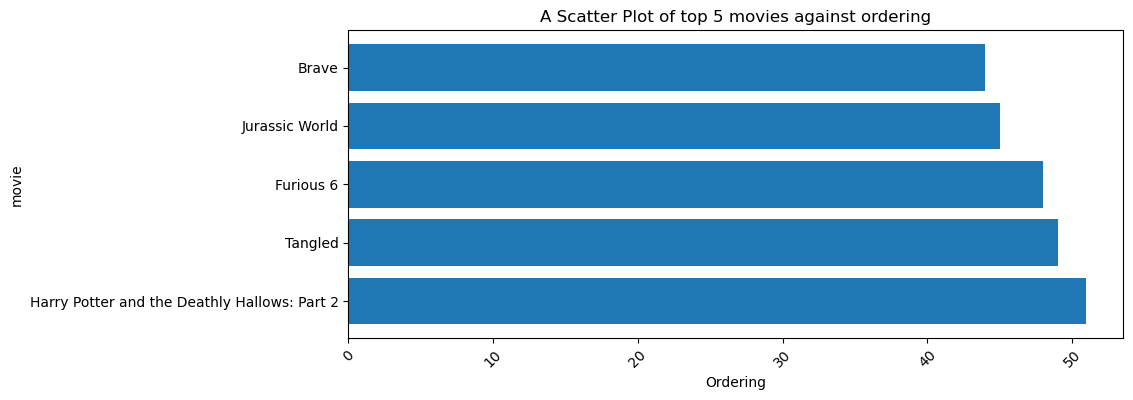

In [793]:
fig, ax= plt.subplots(figsize = (10, 4))

# Plotting the scatter plot
plt.barh(table0['movie_title'][:5],table0['ordering'][:5])
plt.xticks(rotation=45)
ax.set_xlabel('Ordering')
ax.set_ylabel('movie')
ax.set_title('A Scatter Plot of top 5 movies against ordering')

# Showing the plot
plt.show();

In [794]:
query1 = """
SELECT *
FROM movie_ratings;
"""
# Creating a DataFrame and checking the data

table1 = pd.read_sql(query1, conn)
table1.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


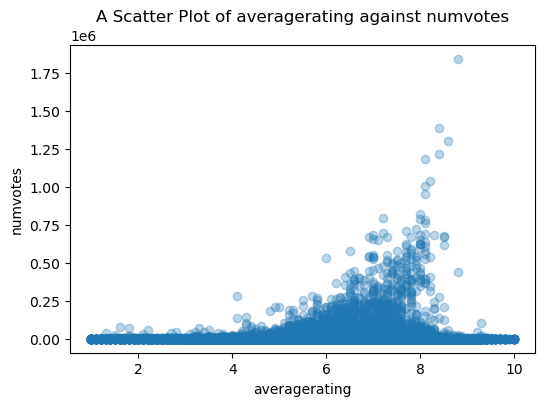

In [797]:
## Setting up the figure and axes
fig, ax = plt.subplots(figsize = (6, 4))

# Plotting the scatter plot
plt.scatter(x=table1['averagerating'], y=table1['numvotes'],alpha=0.3)
#sns.barplot(x=table1['averagerating'], y=table1['numvotes'], color = 'green',alpha=0.5)
ax.set_xlabel('averagerating')
ax.set_ylabel('numvotes')
ax.set_title('A Scatter Plot of averagerating against numvotes')

# Showing the plot
plt.show();

In [639]:
query4 = """
SELECT DISTINCT original_title,movie_id,movie_akas.ordering,title
FROM movie_akas
JOIN movie_basics
    USING (movie_id)
JOIN principals
    USING(movie_id)
GROUP BY original_title
ORDER BY movie_akas.ordering DESC
LIMIT 10;
"""
# Creating a DataFrame and checking the data

table4 = pd.read_sql(query4, conn)
table4.head(10)

,original_title,movie_id,ordering,title
0,Þrestir,tt3823018,10,Spatzen
1,Ôtez-moi d'un doute,tt5629340,10,Sácame de dudas
2,Órbita 9,tt3469798,10,Orbiter 9 - Das letzte Experiment
3,Îmi este indiferent daca în istorie vom intra ...,tt8506840,10,Peu m'importe si l'histoire nous considère com...
4,Évolution,tt4291590,10,Evolution
5,Éternité,tt3564574,10,Вiчнiсть
6,Épouse-moi mon pote,tt6021478,10,"Омъжи се за мен, пич"
7,Éperdument,tt4428762,10,Down by Love
8,Ég man þig,tt4966532,10,I Remember You
9,Çogunluk,tt1714014,10,Pleiopsifia
